# WikiLovesAfrica Recruitment Analysis
[J. Nathan Matias](https://natematias.com), February 2019

This code carries out the following functions:
- generates the treatment message for the WikiLovesAfrica experiment
- carries out randomizations, based on data about previous contributors to WikiLovesAfrica ([code](https://paws.wmflabs.org/paws/user/CS_natematias/notebooks/Query%20WikiLovesAfrica%20Images%20and%20How%20Often%20They%20Were%20Viewed.ipynb)) ([data](https://paws.wmflabs.org/paws/user/CS_natematias/edit/wikilovesafrica_all_contributor_stats_20190120.csv))

## Load Data about WikiLovesAfrica Contributors

In [64]:
## Load from CS_natematias PAWS account
wla.contributors <- read.csv(url("https://paws-public.wmflabs.org/paws-public/User:CS_natematias/wikilovesafrica_all_contributor_stats_20190120.csv"))
wla.images <- read.csv(url("https://paws-public.wmflabs.org/paws-public/User:CS_natematias/wikilovesafrica_all_images_usage_view_metadata_20190120.csv"))

## Load Data about WikiLovesAfrica Views

In [13]:
data.dir = "~/Tresors/CivilServant/projects/wikipedia-integration/wikipedia-loves-africa/mediacounts"

In [21]:
wla.views <- read.csv(file.path(data.dir, "wla-mediacounts-by-file-2015-2018.csv"))
wla.views$img_name <- wla.views$filename_unquoted 

In [47]:
wla.image.views <- merge(x=wla.images, y=wla.views, by="img_name", all.x = TRUE)

In [48]:
print(paste("Images: ", nrow(wla.images)))
print(paste("View records: ", nrow(wla.views)))
print(paste("Image + View records: ", nrow(wla.image.views)))

[1] "Images:  39085"
[1] "View records:  35606"
[1] "Image + View records:  39085"


## Produce Report about Transfers
The included transfers are from 2015-2018.

In [61]:
print(paste(prettyNum(nrow(wla.image.views), big.mark=","), 
            "WikiLovesAfrica submissions from",
            prettyNum(length(unique(wla.images$img_user)), big.mark=","),
            "contributors had",
            prettyNum(sum(wla.images$article_usage_count), big.mark=","),
            "article appearances as of Jan 2019 and had received", 
            prettyNum(sum(wla.views$total_transfers),big.mark = ","),
            "views between 2015 through the end of 2018."))

[1] "39,085 WikiLovesAfrica submissions from 4,658 contributors had 7,457 article appearances as of Jan 2019 and had received 278,859,973 views between 2015 through the end of 2018."


In [116]:
### Probability to Return At Least Once
wla.contributors$returned <- wla.contributors$last_wla_year > wla.contributors$first_wla_year

In [117]:
summary(wla.contributors$returned)

   Mode   FALSE    TRUE 
logical    4529     129 

# Carry out Randomizations

In [128]:
library(blockTools)    # For matching pairs based on Mahalanobis distance
set.seed(1550547161)   # Set random seed
options(repr.plot.width=7, repr.plot.height=3.5)

[1] "FIRST WLA YEAR"
2014 2015 2016 2017 
 844  690  771 2353 
[1] "LAST WLA YEAR"
2014 2015 2016 2017 
 798  665  748 2447 
[1] "TOTAL IMAGE ARTICLE USAGE COUNT"


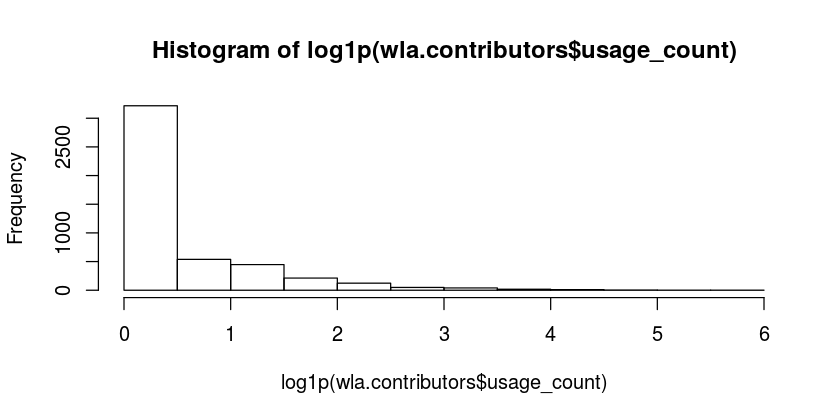

In [109]:
print("FIRST WLA YEAR")
print(summary(factor(wla.contributors$first_wla_year)))
print("LAST WLA YEAR")
print(summary(factor(wla.contributors$last_wla_year)))
print("TOTAL IMAGE ARTICLE USAGE COUNT")
hist(log1p(wla.contributors$usage_count))

In [110]:
wla.contributors$id <- seq(1,nrow(wla.contributors))

In [138]:
wla.contributors$blocks <- 
    createBlockIDs(obj <- block(data=wla.contributors[c("last_wla_year", "username", "image_count", "returned")],
                            n.tr=3,
                            id.vars="username",
                            groups=c("last_wla_year"),
                            block_vars=c("image_count"),
                            distance="mahalanobis"),
                   data = wla.contributors,
                   id.var = "username")

In [142]:
wla.assignments <- assignment(obj, seed = 1550547161, namesCol=c("Control", "Altruism", "Competition"))

In [150]:
diagnose(wla.assignments, data = wla.contributors, 
         id.vars="username", suspect.var="image_count")


Units differing by at least  and no
more than  on image_count:

Group: 2014 
      [,1]                                           
[1,]  No units with different treatments are suspect.

Group: 2015 
      [,1]                                           
[1,]  No units with different treatments are suspect.

Group: 2016 
      [,1]                                           
[1,]  No units with different treatments are suspect.

Group: 2017 
      [,1]                                           
[1,]  No units with different treatments are suspect.


### Write assignments to CSV:

In [166]:
write.csv(wla.assignments$assg$"2014", 
          file=file.path("random-assignments",
                         "2014.randomizations.csv"),
          fileEncoding = "UTF-8")

write.csv(wla.assignments$assg$"2015", 
          file=file.path("random-assignments",
                         "2015.randomizations.csv"),
          fileEncoding = "UTF-8")

write.csv(wla.assignments$assg$"2016", 
          file=file.path("random-assignments",
                         "2016.randomizations.csv"),
          fileEncoding = "UTF-8")

write.csv(wla.assignments$assg$"2017", 
          file=file.path("random-assignments",
                         "2017.randomizations.csv"),
          fileEncoding = "UTF-8")